# Constructing kernels for PSF matching of HST and JWST images

In this tutorial, we will construct convolution kernels for PSF matching of HST and JWST images using [Photutils](https://photutils.readthedocs.io/en/stable/index.html). A more comprehensive tutorial and descriptions on this can also be found at the [Photutils' website](https://photutils.readthedocs.io/en/stable/psf_matching.html). 

In [1]:
import os, sys
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

%matplotlib inline

In [2]:
filters = ['hst_acs_f435w', 'hst_acs_f475w', 'hst_acs_f555w', 'hst_acs_f606w', 'hst_acs_f625w',
            'hst_acs_f775w', 'hst_acs_f814w', 'hst_acs_f850lp', 'jwst_nircam_f115w', 
           'jwst_nircam_f150w', 'jwst_nircam_f200w', 'jwst_nircam_f277w', 'jwst_nircam_f356w', 
           'jwst_nircam_f444w', 'jwst_nircam_f480m']
nbands = len(filters)
print ("Number of filters: %d" % nbands)

fil_names = ['HST_F435W', 'HST_F475W', 'HST_F555W', 'HST_F606W', 'HST_F625W', 'HST_F775W', 
             'HST_F814W', 'HST_F850LP', 'JWST_F115W', 'JWST_F150W', 'JWST_F200W', 
             'JWST_F277W', 'JWST_F356W', 'JWST_F444W', 'JWST_F480M']

pixsize_image = [0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 
                 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.019999999999999896, 0.019999999999999896, 
                 0.019999999999999896, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973]

# make dictionary for the names of PSF images
psf_image = {}
for bb in range(0,nbands):
    psf_image[filters[bb]] = 'PSF_%s.fits' % fil_names[bb]

# make dictionary for the pixel size of the PSF images
pixsize = {}
for ii in range(0,nbands):
    pixsize[filters[ii]] = pixsize_image[ii]

Number of filters: 15


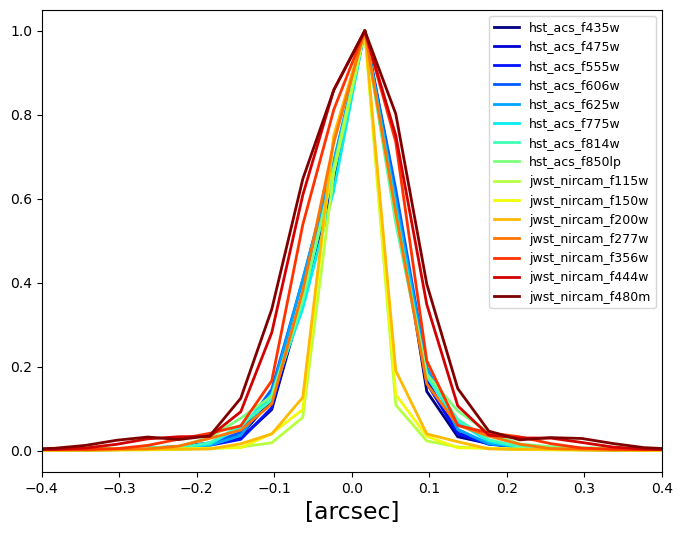

In [5]:
%matplotlib inline

from piXedfit.piXedfit_images import radial_profile_psf

cmap = plt.get_cmap('jet', nbands)

fig1 = plt.figure(figsize=(8,6))
f1 = plt.subplot()
plt.xlim(-0.4,0.4)
plt.xlabel('[arcsec]', fontsize=17)

for bb in range(nbands):
    psf_rad, psf_val = radial_profile_psf(psf_image[filters[bb]], pixsize[filters[bb]], dr_arcsec=0.04)
    
    plt.plot(psf_rad, psf_val, lw=2, color=cmap(bb), label=filters[bb])
    
plt.legend(fontsize=9)

In [6]:
from piXedfit.piXedfit_images import create_psf_matching_kernel
from piXedfit.piXedfit_images import test_psfmatching_kernel

## (1) HST/F435W -> JWST/F480M

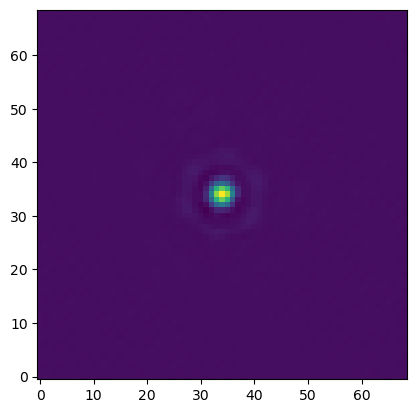

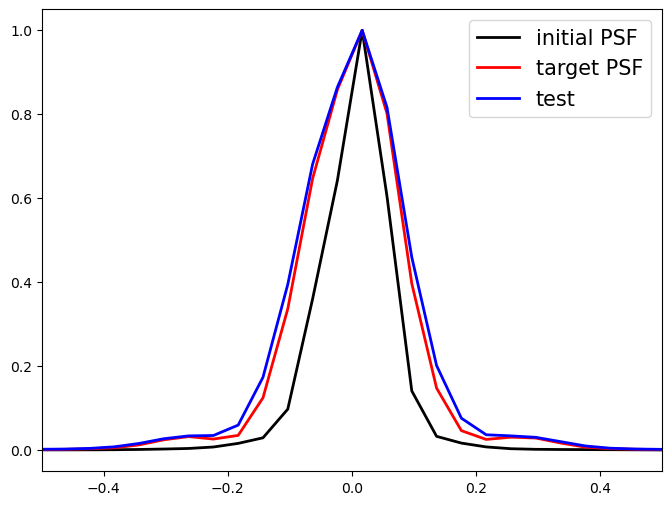

In [7]:
id_fil = 0
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.04)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (2) HST/F475W -> JWST/F480M

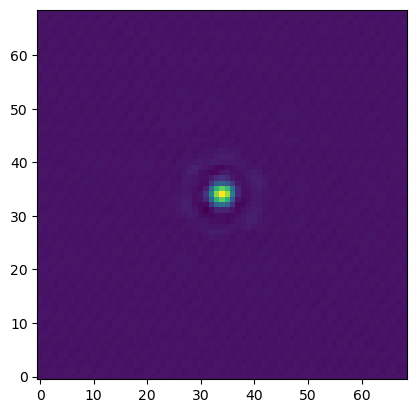

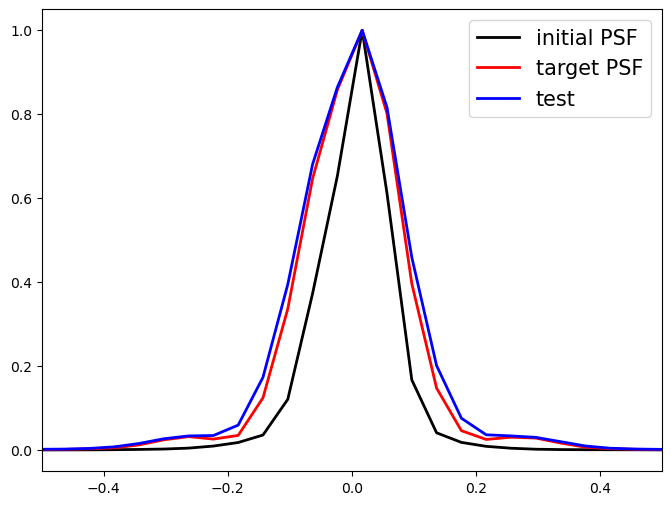

In [8]:
id_fil = 1
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.04)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (3) HST/F555W -> JWST/F480M

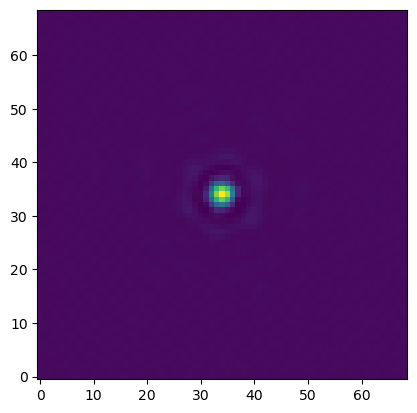

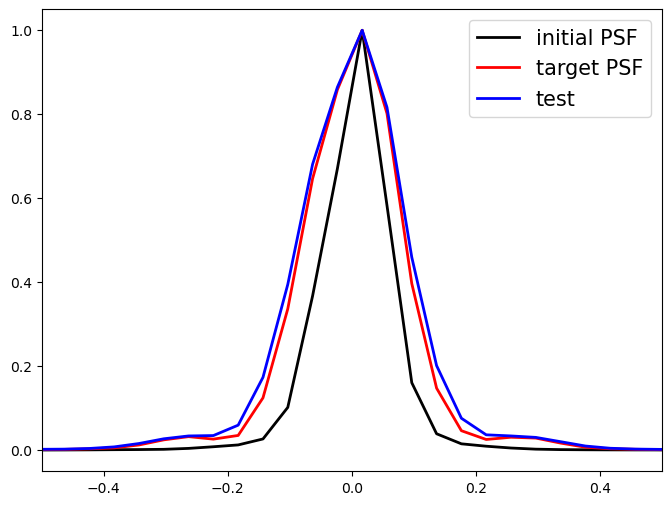

In [9]:
id_fil = 2
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.04)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (4) HST/F606W -> JWST/F480M

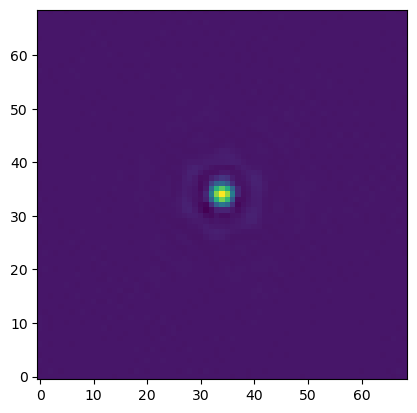

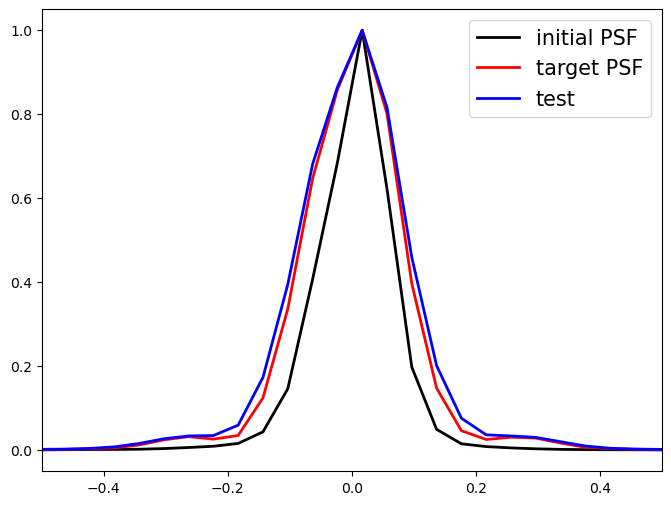

In [10]:
id_fil = 3
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.04)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (5) HST/F625W -> JWST/F480M 

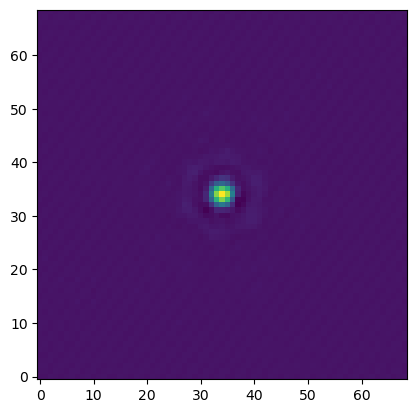

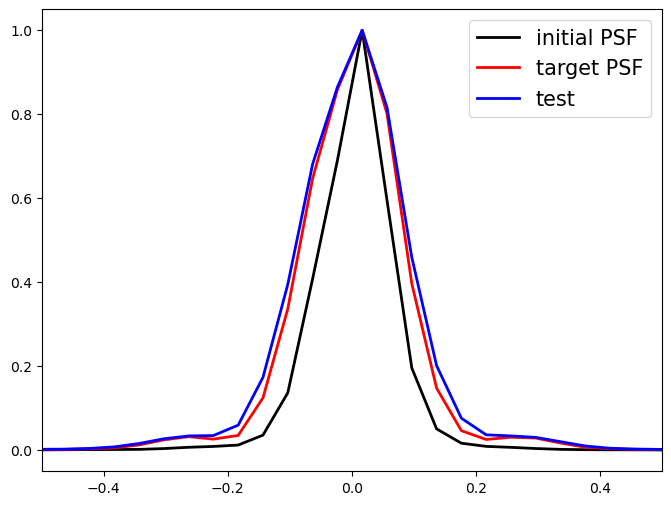

In [11]:
id_fil = 4
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.04)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (6) HST/F775W -> JWST/F480M

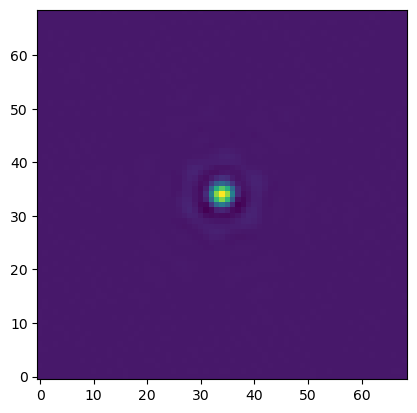

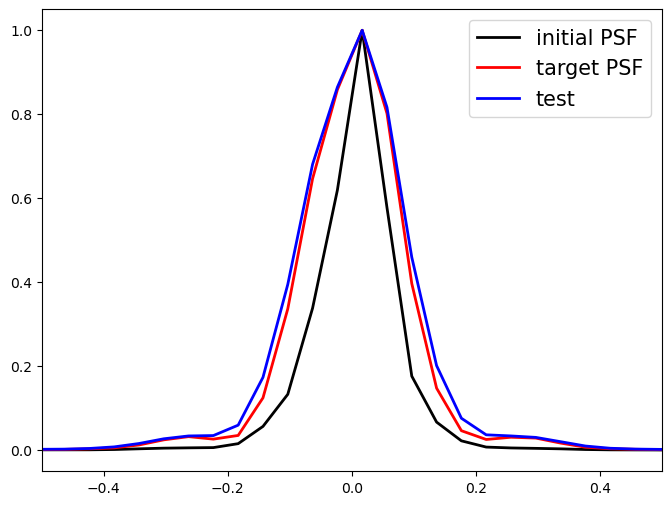

In [12]:
id_fil = 5
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.04)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (7) HST/F814W -> JWST/F480M 

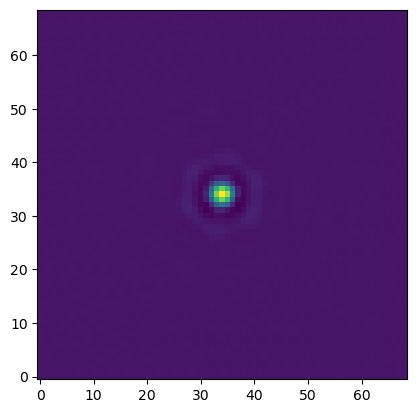

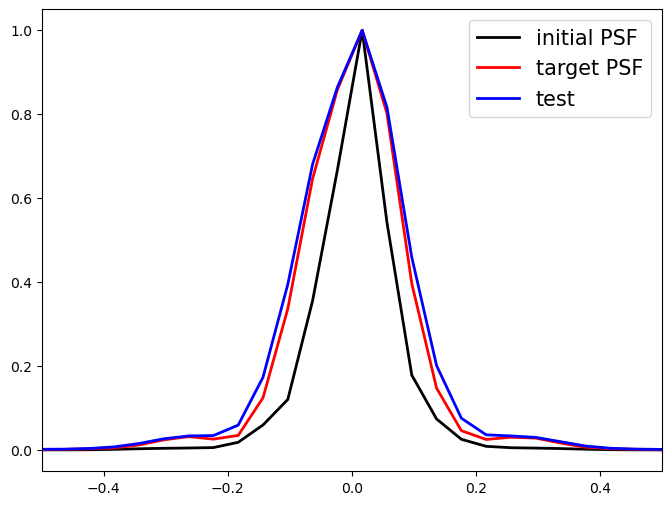

In [13]:
id_fil = 6
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.04)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (8) HST/F850LP -> JWST/F480M

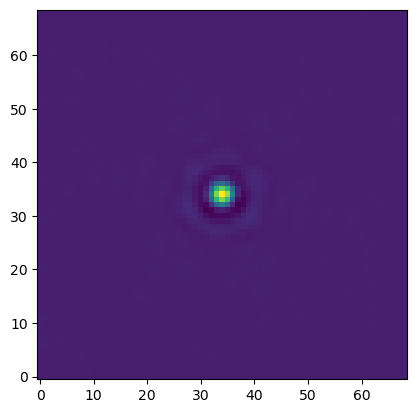

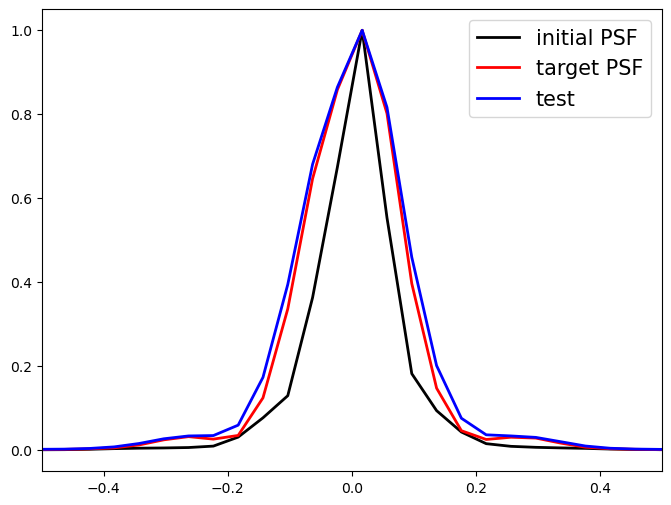

In [14]:
id_fil = 7
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.04)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (9) JWST/F115W -> JWST/F480M

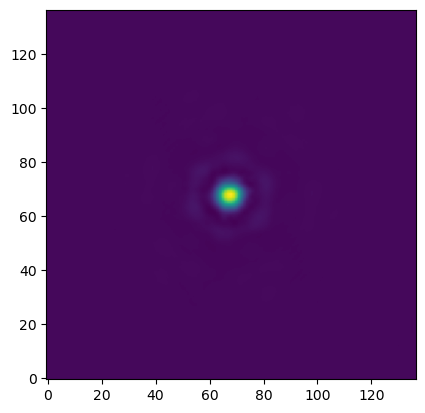

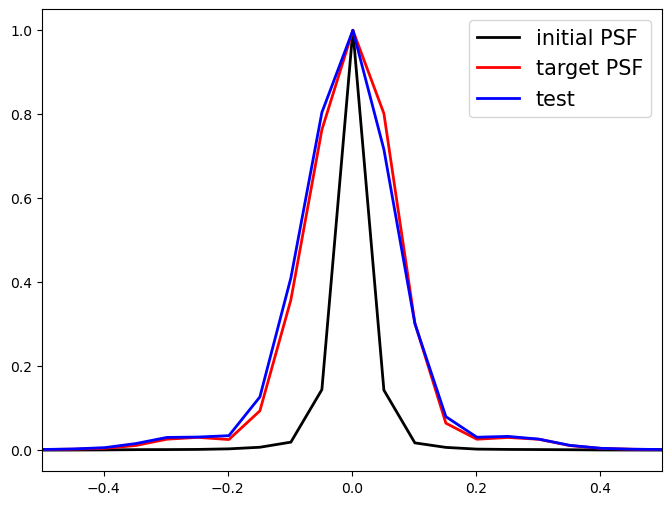

In [17]:
id_fil = 8
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.05)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (10) JWST/F150W -> JWST/F480M

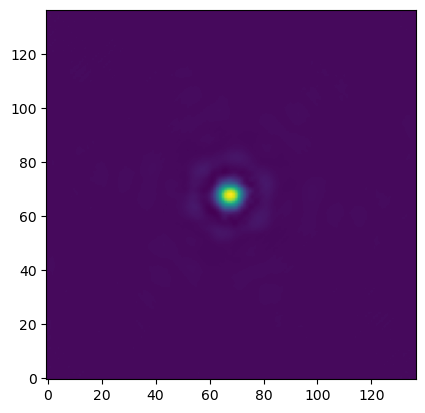

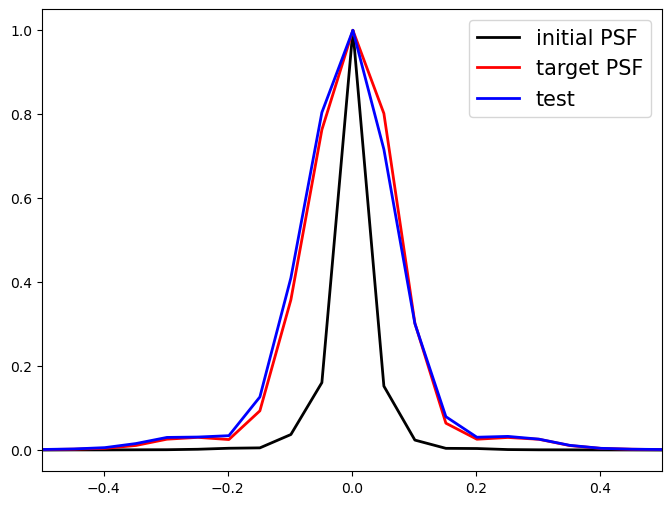

In [19]:
id_fil = 9
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.05)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (11) JWST/F200W -> JWST/F480M

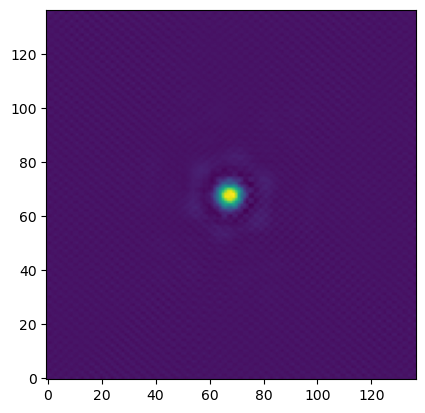

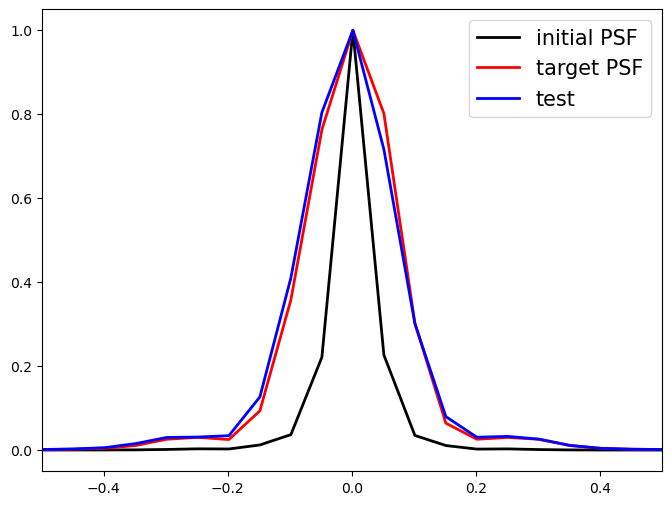

In [22]:
id_fil = 10
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.05)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (12) JWST/F277W -> JWST/F480M

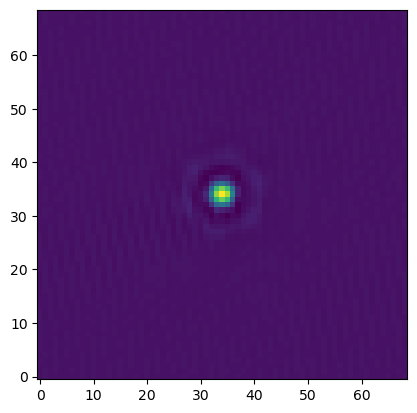

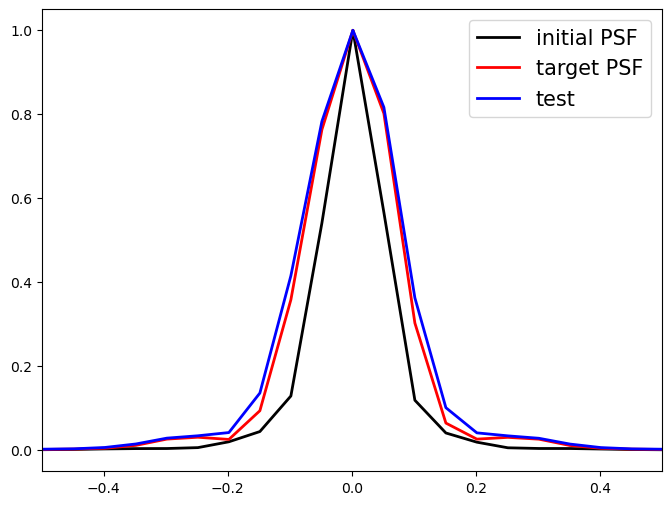

In [23]:
id_fil = 11
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.05)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (13) JWST/F356W -> JWST/F480M

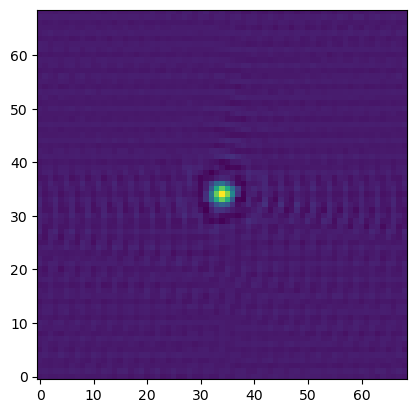

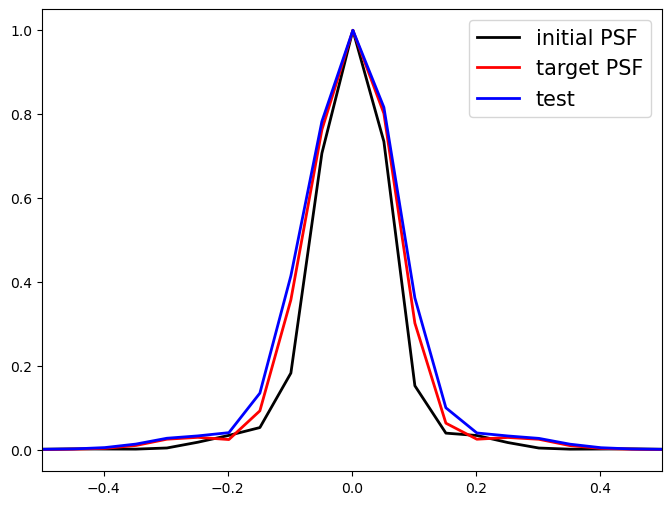

In [24]:
id_fil = 12
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.05)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)

## (14) JWST/F444W -> JWST/F480M

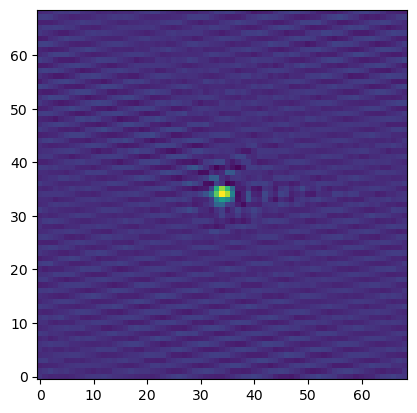

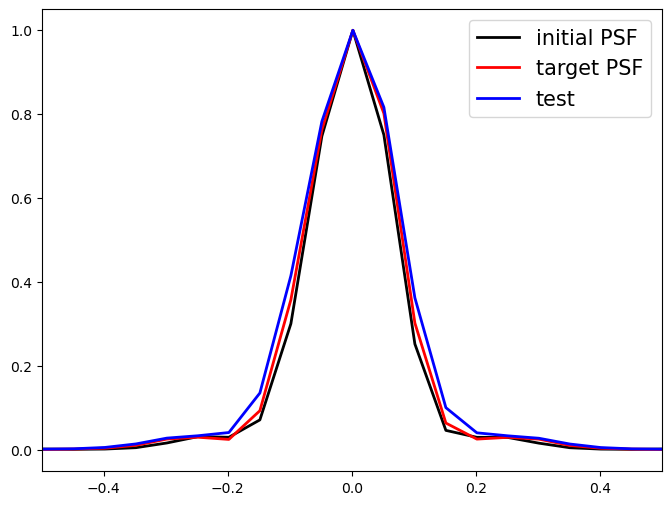

In [25]:
id_fil = 13
id_fil_target = 14

init_PSF_name = psf_image[filters[int(id_fil)]]
target_PSF_name = psf_image['jwst_nircam_f480m']
pixscale_init_PSF = pixsize[filters[int(id_fil)]]
pixscale_target_PSF = pixsize['jwst_nircam_f480m']
kernel = create_psf_matching_kernel(init_PSF_name, target_PSF_name, pixscale_init_PSF, pixscale_target_PSF, window='cosine_bell', window_arg=1.0)

plt.figure()
plt.imshow(kernel, origin='lower')

# test the kernel
test_psfmatching_kernel(init_PSF_name, target_PSF_name, kernel, pixscale_init_PSF, pixscale_target_PSF, dr_arcsec=0.05)

# store the kernel into FITS file
name_out = 'kernel_%s_to_%s.fits' % (fil_names[int(id_fil)],fil_names[int(id_fil_target)])
fits.writeto(name_out, kernel, overwrite=True)